In [1]:
import cartopy.feature as cfeature
import numpy as np                         # Good module for matrix and matrix operation
import matplotlib as mpl
import matplotlib.pyplot as plt            # Module to produce figure
import matplotlib.colors as colors
import os                                  # Used to convert png to other format
from datetime import datetime
from matplotlib import gridspec,rc
from scipy.stats import spearmanr, pearsonr
import pandas as pd

In [2]:
df = pd.read_fwf('Stormlist_inNNA_2001_2020_exceedance_WDp99p0_TPp99p0_timeavg.txt',  widths=[6, 9, 13, 10, 10, 9, 9], 
                names=['Stormno', 'pmin', 'vors','Wexceed','Pexceed','Wexarea','Pexarea'])

In [3]:
df

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea
0,1,968.40,0.000111,0.00000,0.00000,0.0,0.0
1,2,957.87,0.000173,0.00000,0.00000,0.0,0.0
2,3,995.92,0.000061,0.00000,0.00000,0.0,0.0
3,4,974.74,0.000065,0.00000,0.00000,0.0,0.0
4,5,981.92,0.000102,0.00000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...
12354,12355,982.60,0.000119,0.00000,0.00000,0.0,0.0
12355,12356,968.17,0.000122,0.17436,0.15764,3501.0,3051.0
12356,12357,977.07,0.000091,0.00639,0.00207,339.0,129.0
12357,12358,954.78,0.000219,0.00000,0.00000,0.0,0.0


In [4]:
# The above dataframe contains all ETCs in NNA, but we only want to consider the ones that caused 
# at least one hourly local extreme in the region. So remove the rest...
df = df[~((df['Wexarea'] == 0.0) & (df['Pexarea'] == 0.0))]

In [5]:
df

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea
617,618,1007.13,0.000052,0.00000,0.00000,0.0,2.0
620,621,976.90,0.000119,0.00226,0.00000,74.0,0.0
626,627,985.58,0.000084,0.20023,0.00523,3111.0,423.0
629,630,991.15,0.000089,0.06567,0.00016,794.0,24.0
630,631,977.31,0.000125,0.00789,0.00923,233.0,399.0
...,...,...,...,...,...,...,...
12350,12351,1002.46,0.000047,0.00017,0.00000,11.0,0.0
12352,12353,1001.77,0.000040,0.00000,0.00004,0.0,1.0
12353,12354,996.97,0.000065,0.00168,0.00493,115.0,196.0
12355,12356,968.17,0.000122,0.17436,0.15764,3501.0,3051.0


In [6]:
df['Wexrank']=df['Wexceed'].rank(ascending=False)
df['Pexrank']=df['Pexceed'].rank(ascending=False)
df['Warerank']=df['Wexarea'].rank(ascending=False)
df['Parerank']=df['Pexarea'].rank(ascending=False)
df['WPexceed']=df['Wexceed']*df['Pexceed']
df['WPexrank']=df['WPexceed'].rank(ascending=False)

/tmp/ipykernel_3811502/1355503860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wexrank']=df['Wexceed'].rank(ascending=False)
/tmp/ipykernel_3811502/1355503860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pexrank']=df['Pexceed'].rank(ascending=False)
/tmp/ipykernel_3811502/1355503860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [7]:
### 2019 Halloween Storm number: 11649
Halloween = df[df['Stormno'] == 11649]

In [8]:
Halloween

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea,Wexrank,Pexrank,Warerank,Parerank,WPexceed,WPexrank
11648,11649,976.47,0.000128,0.28029,0.27947,4059.0,3481.0,76.0,245.5,119.0,401.5,0.078333,48.0


In [9]:
Wex95= df['Wexceed'].quantile(.95, interpolation='linear')
Pex95= df['Pexceed'].quantile(.95, interpolation='linear')
WPex95= df['WPexceed'].quantile(.95, interpolation='linear')

Wex98= df['Wexceed'].quantile(.98, interpolation='linear')
Pex98= df['Pexceed'].quantile(.98, interpolation='linear')
WPex98= df['WPexceed'].quantile(.98, interpolation='linear')

Wex99= df['Wexceed'].quantile(.99, interpolation='linear')
Pex99= df['Pexceed'].quantile(.99, interpolation='linear')
WPex99= df['WPexceed'].quantile(.99, interpolation='linear')


Wex999= df['Wexceed'].quantile(.999, interpolation='linear')
Pex999= df['Pexceed'].quantile(.999, interpolation='linear')
WPex999= df['WPexceed'].quantile(.999, interpolation='linear')

print(WPex95)
print(WPex98)
print(WPex99)

0.0207614421
0.04912281843999962
0.07215035896000006


In [10]:
curve_x = np.arange(0.01, 1.3, 0.01)
nx = curve_x.shape[0]

curve_y98= np.zeros_like(curve_x)
curve_y99= np.zeros_like(curve_x)
curve_y999= np.zeros_like(curve_x)

for n in range(nx):
    curve_y98[n]= WPex98/curve_x[n]
    curve_y99[n]= WPex99/curve_x[n]
    curve_y999[n]= WPex999/curve_x[n]
    

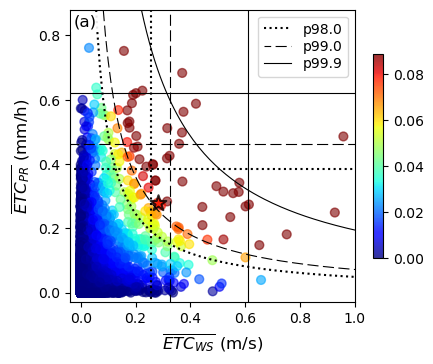

In [11]:
fig = plt.figure(figsize=(4.6,3.8))
ax = fig.add_subplot(1, 1, 1)

cf=plt.scatter(df['Wexceed'], df['Pexceed'] , c= df['WPexceed'] ,
            cmap = 'jet', vmin= 0, vmax = 0.089 ,s = 40, alpha =0.6)

plt.scatter(Halloween['Wexceed'], Halloween['Pexceed'] , c= Halloween['WPexceed'], marker='*',
            edgecolor='k', lw=1.5, vmin= 0, vmax = 0.089,
            cmap = 'jet', s = 140, alpha =0.8)

plt.plot(curve_x, curve_y98, linestyle='dotted', color='k', lw=1.5, label='p98.0')

#plt.axvline(x=Wex95, ymin=-0.1, ymax=1, linestyle='dashed', color='k', lw=0.5)
#plt.axhline(y=Pex95, xmin=-0.1, xmax=1, linestyle='dashed', color='k', lw=0.5)

plt.axvline(x=Wex98, ymin=-0.1, ymax=1, linestyle='dotted', color='k', lw=1.5)
plt.axhline(y=Pex98, xmin=-0.1, xmax=1, linestyle='dotted', color='k', lw=1.5)

plt.plot(curve_x, curve_y99, linestyle=(4, (10, 4)), color='k', lw=0.8 , label='p99.0')
plt.axvline(x=Wex99, ymin=-0.1, ymax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)
plt.axhline(y=Pex99, xmin=-0.1, xmax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)

plt.plot(curve_x, curve_y999, linestyle='solid', color='k', lw=0.8, label='p99.9')
plt.axvline(x=Wex999, ymin=-0.1, ymax=1, linestyle='solid', color='k', lw=0.8)
plt.axhline(y=Pex999, xmin=-0.1, xmax=1, linestyle='solid', color='k', lw=0.8)


plt.ylim(-0.03,0.88)
plt.xlim(-0.04,1.0)
#plt.text(0.8,0.2,'99.9th perc.')
#plt.text(0.8,0.08,'99th perc.')
#plt.text(0.8,0.0,'98th perc.')

plt.legend(loc="upper right",labelspacing = 0.25) 

#h1,_ = cntr1.legend_elements()
#h2,_ = cntr2.legend_elements()
#h3,_ = cntr3.legend_elements()
#ax.legend([h1[0], h2[0], h3[0]], ['98th', '99th', '99.9th'])
#cbaxes = fig.add_axes([0.8, 0.1, 0.016, 0.32])  
#cb = plt.colorbar(cf, cax = cbaxes, orientation='vertical')
cbar = plt.colorbar(shrink=0.7)
#cbar.ax.set_title(r'$\overline{\mathrm{EE}_{PR}}\cdot\overline{\mathrm{EE}_{WS}}$', x=6, y=0.32, rotation=90, fontsize=12)

plt.text(-0.025,0.865,'(a)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top',fontsize=12,zorder=28)
plt.ylabel(r'$\overline{{ETC}_{PR}}$ (mm/h)',fontsize=12)
plt.xlabel(r'$\overline{{ETC}_{WS}}$ (m/s)',fontsize=12)
plt.savefig('Fig10a_tempavg_exceedance_storm', bbox_inches='tight', dpi=200)


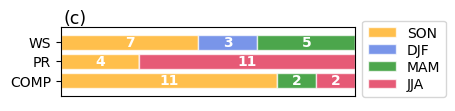

In [12]:
season_names=['SON','DJF','MAM','JJA']
results={
    'WS': [ 7, 3, 5, 0],
    'PR': [ 4, 0, 0, 11],
    'COMP': [ 11, 0, 2, 2]
}

def season_count(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    #category_colors = plt.get_cmap('RdYlGn')(
    #    np.linspace(0.15, 0.85, data.shape[1]))
    category_colors = [ 'orange', 'royalblue','green','crimson']

    fig, ax = plt.subplots(figsize=(3.8, 0.9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.set_ylim(2.8,-0.8)
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.8,
                label=colname, color=color, alpha=0.7, ec='white')
        xcenters = starts + widths / 2

        #r, g, b, _ = color
        text_color = 'white' #if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c > 0:
                ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color, fontsize=10, weight='bold')
    ax.legend(ncol=1, bbox_to_anchor=(1, -0.11),
              loc='lower left', fontsize='medium',labelspacing = 0.22)

    return fig, ax



season_count(results, season_names)
plt.text(0.15,-1.7,'(c)',bbox={'facecolor':'None','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top',fontsize=12.5,zorder=28)
plt.savefig('Fig10c_tempavg_storm_seacount', bbox_inches='tight', dpi=200)

plt.show()

### Supporting information

In [19]:
df_Wtop15 = df[df['Wexrank']<16]

In [20]:
df_Wtop15

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea,Wexrank,Pexrank,Warerank,Parerank,WPexceed,WPexrank
1348,1349,962.30,0.000110,0.92657,0.24938,8405.0,5544.0,2.0,313.0,2.0,73.0,0.231068,4.0
2288,2289,968.70,0.000128,0.52042,0.16569,6807.0,3455.0,13.0,653.0,16.0,416.0,0.086228,43.0
3472,3473,969.86,0.000149,0.60092,0.26852,8423.0,5657.0,7.0,272.0,1.0,67.0,0.161359,15.0
4789,4790,970.17,0.000116,0.65748,0.03964,7074.0,2093.0,4.0,1914.5,10.0,924.0,0.026063,198.0
5480,5481,972.42,0.000137,0.60068,0.10989,6666.0,3361.0,8.0,1011.0,17.0,445.0,0.066009,64.0
5588,5589,977.84,0.000117,0.55567,0.30958,7407.0,6548.0,11.0,193.0,8.0,24.0,0.172024,9.0
6418,6419,955.09,0.000153,0.57613,0.31341,6972.0,5709.0,10.0,183.0,12.0,60.0,0.180565,8.0
8203,8204,966.02,0.000146,0.61322,0.27430,7024.0,5248.0,6.0,256.0,11.0,90.0,0.168206,10.0
9357,9358,957.23,0.000128,0.52011,0.31446,5716.0,6016.0,14.0,182.0,36.0,45.0,0.163554,13.0
9443,9444,958.97,0.000104,0.54528,0.23532,6140.0,4672.0,12.0,353.0,23.0,150.5,0.128315,20.0


In [21]:
df_Ptop15 = df[df['Pexrank']<16]

In [22]:
df_Ptop15

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea,Wexrank,Pexrank,Warerank,Parerank,WPexceed,WPexrank
1663,1664,958.40,0.000152,0.37000,0.68350,6233.0,6725.0,32.0,3.0,21.0,15.0,0.252895,2.0
3290,3291,981.63,0.000090,0.06052,0.61687,2169.0,5862.0,757.0,7.0,450.0,51.0,0.037333,145.0
4451,4452,983.10,0.000117,0.07555,0.57491,1844.0,7040.0,621.0,13.0,557.5,8.0,0.043434,123.0
4556,4557,970.55,0.000156,0.42015,0.58782,5783.0,6708.0,24.0,11.0,33.0,16.0,0.246973,3.0
5030,5031,980.68,0.000122,0.18674,0.58937,3929.0,7253.0,197.5,10.0,134.0,5.0,0.110059,26.0
5714,5715,995.53,0.000072,0.00706,0.59962,323.0,7570.0,2113.0,9.0,1902.0,2.0,0.004233,731.0
6338,6339,985.67,0.000096,0.19101,0.61529,4039.0,7335.0,192.0,8.0,122.0,3.0,0.117527,25.0
8557,8558,978.68,0.000121,0.20133,0.62072,4759.0,8532.0,168.0,6.0,66.0,1.0,0.124970,22.0
8654,8655,986.53,0.000113,0.04984,0.58542,1324.0,5676.0,885.0,12.0,798.0,65.0,0.029177,183.0
9208,9209,986.40,0.000112,0.22472,0.62837,3713.0,6557.0,138.0,5.0,150.5,23.0,0.141207,16.0


In [23]:
df_WPtop15 = df[df['WPexrank']<16]

In [24]:
df_WPtop15

,Stormno,pmin,vors,Wexceed,Pexceed,Wexarea,Pexarea,Wexrank,Pexrank,Warerank,Parerank,WPexceed,WPexrank
902,903,981.45,0.000140,0.35879,0.46311,4539.0,5550.0,38.0,53.0,78.5,72.0,0.166159,11.0
1348,1349,962.30,0.000110,0.92657,0.24938,8405.0,5544.0,2.0,313.0,2.0,73.0,0.231068,4.0
1663,1664,958.40,0.000152,0.37000,0.68350,6233.0,6725.0,32.0,3.0,21.0,15.0,0.252895,2.0
2156,2157,970.31,0.000143,0.31550,0.51183,3503.0,6420.0,62.0,34.0,171.0,29.0,0.161482,14.0
2766,2767,977.63,0.000124,0.36922,0.49811,6017.0,6698.0,33.0,37.0,26.0,17.0,0.183912,7.0
3472,3473,969.86,0.000149,0.60092,0.26852,8423.0,5657.0,7.0,272.0,1.0,67.0,0.161359,15.0
4556,4557,970.55,0.000156,0.42015,0.58782,5783.0,6708.0,24.0,11.0,33.0,16.0,0.246973,3.0
5588,5589,977.84,0.000117,0.55567,0.30958,7407.0,6548.0,11.0,193.0,8.0,24.0,0.172024,9.0
5841,5842,950.82,0.000151,0.49479,0.33131,7534.0,6258.0,17.0,161.0,7.0,36.0,0.163929,12.0
6418,6419,955.09,0.000153,0.57613,0.31341,6972.0,5709.0,10.0,183.0,12.0,60.0,0.180565,8.0


corr(WS,pmin) -0.3601691432581751
corr(PR,pmin) -0.08676732778226844
corr(WP,pmin) -0.21447363577799772


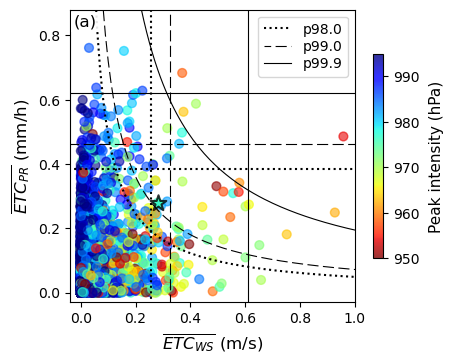

In [25]:
fig = plt.figure(figsize=(4.6,3.8))
ax = fig.add_subplot(1, 1, 1)

cf=plt.scatter(df['Wexceed'], df['Pexceed'] ,  c= df['pmin'] ,
            cmap = 'jet_r', vmin= 950, vmax = 995 ,s = 40, alpha =0.6)

plt.scatter(Halloween['Wexceed'], Halloween['Pexceed'] , c= Halloween['pmin'], marker='*',
            edgecolor='k', lw=1.5, vmin= 950, vmax = 995,
            cmap = 'jet_r', s = 140, alpha =0.8)

plt.plot(curve_x, curve_y98, linestyle='dotted', color='k', lw=1.5, label='p98.0')

#plt.axvline(x=Wex95, ymin=-0.1, ymax=1, linestyle='dashed', color='k', lw=0.5)
#plt.axhline(y=Pex95, xmin=-0.1, xmax=1, linestyle='dashed', color='k', lw=0.5)

plt.axvline(x=Wex98, ymin=-0.1, ymax=1, linestyle='dotted', color='k', lw=1.5)
plt.axhline(y=Pex98, xmin=-0.1, xmax=1, linestyle='dotted', color='k', lw=1.5)

plt.plot(curve_x, curve_y99, linestyle=(4, (10, 4)), color='k', lw=0.8 , label='p99.0')
plt.axvline(x=Wex99, ymin=-0.1, ymax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)
plt.axhline(y=Pex99, xmin=-0.1, xmax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)

plt.plot(curve_x, curve_y999, linestyle='solid', color='k', lw=0.8, label='p99.9')
plt.axvline(x=Wex999, ymin=-0.1, ymax=1, linestyle='solid', color='k', lw=0.8)
plt.axhline(y=Pex999, xmin=-0.1, xmax=1, linestyle='solid', color='k', lw=0.8)

print('corr(WS,pmin)', df['Wexceed'].corr(df['pmin']))
print('corr(PR,pmin)', df['Pexceed'].corr(df['pmin']))
print('corr(WP,pmin)', df['WPexceed'].corr(df['pmin']))

plt.ylim(-0.03,0.88)
plt.xlim(-0.04,1.0)
#plt.text(0.8,0.2,'99.9th perc.')
#plt.text(0.8,0.08,'99th perc.')
#plt.text(0.8,0.0,'98th perc.')

plt.legend(loc="upper right",labelspacing = 0.25) 

#h1,_ = cntr1.legend_elements()
#h2,_ = cntr2.legend_elements()
#h3,_ = cntr3.legend_elements()
#ax.legend([h1[0], h2[0], h3[0]], ['98th', '99th', '99.9th'])
#cbaxes = fig.add_axes([0.8, 0.1, 0.016, 0.32])  
#cb = plt.colorbar(cf, cax = cbaxes, orientation='vertical')
cbar = plt.colorbar(shrink=0.7)
#cbar.ax.set_title(r'$\overline{\mathrm{EE}_{PR}}\cdot\overline{\mathrm{EE}_{WS}}$', x=6, y=0.32, rotation=90, fontsize=12)
cbar.ax.set_title('Peak intensity (hPa)', x=6.2, y=0.1, fontsize=11, rotation=90)

plt.text(-0.025,0.865,'(a)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top',fontsize=12,zorder=28)
plt.ylabel(r'$\overline{{ETC}_{PR}}$ (mm/h)',fontsize=12)
plt.xlabel(r'$\overline{{ETC}_{WS}}$ (m/s)',fontsize=12)
plt.savefig('FigS9a_tempavg_exceedance_storm_pmin', bbox_inches='tight', dpi=200)


corr(WS,pmin) 0.368995363045667
corr(PR,pmin) 0.16167589144808872
corr(WP,pmin) 0.2406562076396742


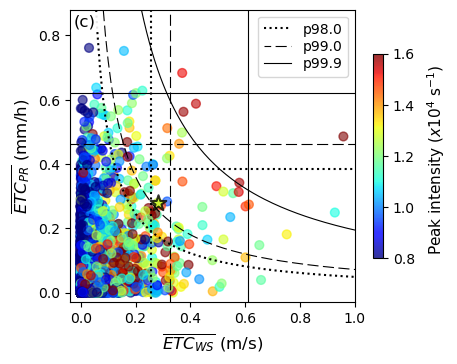

In [26]:
fig = plt.figure(figsize=(4.6,3.8))
ax = fig.add_subplot(1, 1, 1)

cf=plt.scatter(df['Wexceed'], df['Pexceed'] ,  c= df['vors']*1.e4 ,
            cmap = 'jet', vmin= 0.8, vmax = 1.6  ,s = 40, alpha =0.6)

plt.scatter(Halloween['Wexceed'], Halloween['Pexceed'] , c= Halloween['vors']*1.e4, marker='*',
            edgecolor='k', lw=1.5,  vmin= 0.8, vmax = 1.6 ,
            cmap = 'jet', s = 140, alpha =0.8)

plt.plot(curve_x, curve_y98, linestyle='dotted', color='k', lw=1.5, label='p98.0')

#plt.axvline(x=Wex95, ymin=-0.1, ymax=1, linestyle='dashed', color='k', lw=0.5)
#plt.axhline(y=Pex95, xmin=-0.1, xmax=1, linestyle='dashed', color='k', lw=0.5)

plt.axvline(x=Wex98, ymin=-0.1, ymax=1, linestyle='dotted', color='k', lw=1.5)
plt.axhline(y=Pex98, xmin=-0.1, xmax=1, linestyle='dotted', color='k', lw=1.5)

plt.plot(curve_x, curve_y99, linestyle=(4, (10, 4)), color='k', lw=0.8 , label='p99.0')
plt.axvline(x=Wex99, ymin=-0.1, ymax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)
plt.axhline(y=Pex99, xmin=-0.1, xmax=1, linestyle=(4, (10, 4)), color='k', lw=0.8)

plt.plot(curve_x, curve_y999, linestyle='solid', color='k', lw=0.8, label='p99.9')
plt.axvline(x=Wex999, ymin=-0.1, ymax=1, linestyle='solid', color='k', lw=0.8)
plt.axhline(y=Pex999, xmin=-0.1, xmax=1, linestyle='solid', color='k', lw=0.8)

print('corr(WS,pmin)', df['Wexceed'].corr(df['vors']))
print('corr(PR,pmin)', df['Pexceed'].corr(df['vors']))
print('corr(WP,pmin)', df['WPexceed'].corr(df['vors']))

plt.ylim(-0.03,0.88)
plt.xlim(-0.04,1.0)
#plt.text(0.8,0.2,'99.9th perc.')
#plt.text(0.8,0.08,'99th perc.')
#plt.text(0.8,0.0,'98th perc.')

plt.legend(loc="upper right",labelspacing = 0.25) 

#h1,_ = cntr1.legend_elements()
#h2,_ = cntr2.legend_elements()
#h3,_ = cntr3.legend_elements()
#ax.legend([h1[0], h2[0], h3[0]], ['98th', '99th', '99.9th'])
#cbaxes = fig.add_axes([0.8, 0.1, 0.016, 0.32])  
#cb = plt.colorbar(cf, cax = cbaxes, orientation='vertical')
cbar = plt.colorbar(shrink=0.7)
#cbar.ax.set_title(r'$\overline{\mathrm{EE}_{PR}}\cdot\overline{\mathrm{EE}_{WS}}$', x=6, y=0.32, rotation=90, fontsize=12)
cbar.ax.set_title('Peak intensity ('r'$x10^4$'' 'r'$\mathrm{s}^{-1}$)', x=6.2, y=0., fontsize=11, rotation=90)

plt.text(-0.025,0.865,'(c)',bbox={'facecolor':'white','edgecolor':'None','alpha':0.9,'pad':2.0},
        horizontalalignment='left',verticalalignment='top',fontsize=12,zorder=28)
plt.ylabel(r'$\overline{{ETC}_{PR}}$ (mm/h)',fontsize=12)
plt.xlabel(r'$\overline{{ETC}_{WS}}$ (m/s)',fontsize=12)
plt.savefig('FigS9c_tempavg_exceedance_storm_vors', bbox_inches='tight', dpi=200)
